In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import networkx as nx


# Load data

In [2]:
#df = pd.read_csv("../data/raw/observations_v2/CNC_Los_Angeles_2018.csv")
df =  pd.read_csv("data/CNC_London_2018.csv")
df.head()

id                         observed_on_string observed_on  \
0  11479007                  2018-04-27 7:52:34 am BST  2018-04-27   
1  11480212                  2018-04-27 8:39:41 am BST  2018-04-27   
2  11480902  Fri Apr 27 2018 08:34:31 GMT+0100 (GMT+1)  2018-04-27   
3  11481097  Fri Apr 27 2018 09:54:35 GMT+0100 (GMT+1)  2018-04-27   
4  11482247                  2018-04-27 8:42:21 am BST  2018-04-27   

          time_observed_at  time_zone  user_id       user_login  \
0  2018-04-27 07:52:34 UTC        UTC   159021             muki   
1  2018-04-27 07:39:41 UTC     London   664459  lucyrobinsonnhm   
2  2018-04-27 06:34:31 UTC  Amsterdam   908315           tess26   
3  2018-04-27 07:54:35 UTC  Amsterdam   796473      bryonycross   
4  2018-04-27 07:42:21 UTC     London   664459  lucyrobinsonnhm   

                created_at               updated_at quality_grade  ...  \
0  2018-04-27 07:06:17 UTC  2018-04-27 09:26:56 UTC      research  ...   
1  2018-04-27 08:02:52 UTC  2019-01-29 21:16:34 UTC      research  ...   
2  2018-04-27 08:42:01 UTC  2018-04-27 11:01:49 UTC        casual  ...   
3  2018-04-27 08:54:45 UTC  2018-04-27 20:23:41 UTC      research  ...   
4  2018-04-27 10:09:55 UTC  2018-04-27 15:37:31 UTC      research  ...   

  geoprivacy taxon_geoprivacy coordinates_obscured  positioning_method  \
0        NaN              NaN                False                 gps   
1        NaN             open                False                 gps   
2        NaN              NaN                False                 NaN   
3        NaN              NaN                False                 NaN   
4        NaN              NaN                False                 gps   

  positioning_device            species_guess            scientific_name  \
0                gps         lesser celandine              Ficaria verna   
1                gps  Pigeon biset domestique    Columba livia domestica   
2                NaN                      NaN    Hyacinthoides hispanica   
3                NaN            Green Alkanet  Pentaglottis sempervirens   
4                gps             London Plane       Platanus × hispanica   

        common_name  iconic_taxon_name  taxon_id  
0  lesser celandine            Plantae  204321.0  
1      Feral Pigeon               Aves  122767.0  
2  Spanish Bluebell            Plantae   57635.0  
3     Green Alkanet            Plantae  166466.0  
4      London Plane            Plantae  552449.0  

[5 rows x 34 columns]

In [3]:
df.columns

Index(['id', 'observed_on_string', 'observed_on', 'time_observed_at',
       'time_zone', 'user_id', 'user_login', 'created_at', 'updated_at',
       'quality_grade', 'license', 'url', 'image_url', 'sound_url', 'tag_list',
       'description', 'num_identification_agreements',
       'num_identification_disagreements', 'captive_cultivated',
       'oauth_application_id', 'place_guess', 'latitude', 'longitude',
       'positional_accuracy', 'geoprivacy', 'taxon_geoprivacy',
       'coordinates_obscured', 'positioning_method', 'positioning_device',
       'species_guess', 'scientific_name', 'common_name', 'iconic_taxon_name',
       'taxon_id'],
      dtype='object')

In [5]:
# Convert identifications column (which is a string string) to object
import ast
#df['identifications'] = df['identifications'].apply(ast.literal_eval)
#df['species_guess'] = df['species_guess'].apply(ast.literal_eval)



# Analyse identifications

Have values:
 - improving
 - supporting
 - leading
 - maverick

In [6]:
identifications = []
for _, row in df.iterrows():
    idents = row['identifications']
    for ident in idents:
        identifications.append(ident)
        

KeyError: 'identifications'

In [21]:
dfidents = pd.DataFrame(identifications)
dfidents.head()

user_id    category disagreement
0   181940  supporting        False
1   630902   improving         None
2   240872   improving         None
3   805798     leading        False
4   630902   improving         None

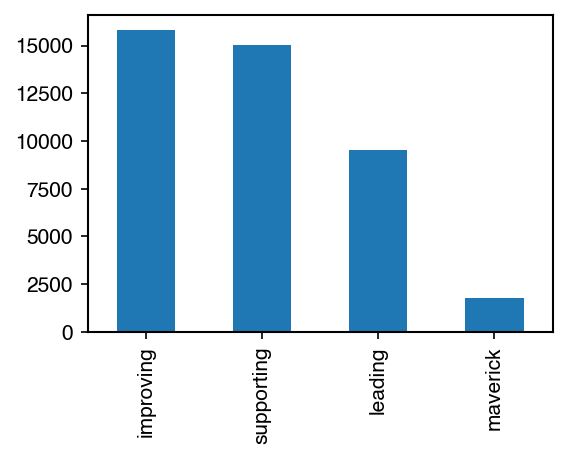

In [28]:
fig = plt.figure(figsize=(4,2.8))
ident_counts = dfidents['category'].value_counts()
ident_counts.plot(kind='bar')
plt.show()

# Convert to network



## Gather edges

In [91]:
edges_list = []
for _, row in df.iterrows():
    idents = row['identifications']
    user_target = row['user_id']
    for ident in idents:
#         if ident['category'] in ['supporting', 'improving']
        user_source = ident['user_id']
        edges_list.append([user_source, user_target])

edges = pd.DataFrame(edges_list, columns=['source', 'target'])
edges = edges.convert_dtypes()
edges['weight'] = 1
edges = edges.groupby(by=['source', 'target']).sum().reset_index()
edges.head()

source  target  weight
0       1   12809       3
1       1   35725       1
2       1   37802       2
3       1   73504       2
4       1   74669       1

In [92]:
edges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9589 entries, 0 to 9588
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   source  9589 non-null   int64
 1   target  9589 non-null   int64
 2   weight  9589 non-null   int64
dtypes: int64(3)
memory usage: 224.9 KB


In [94]:
edges['weight'].max()

1699

**Edge distribution**

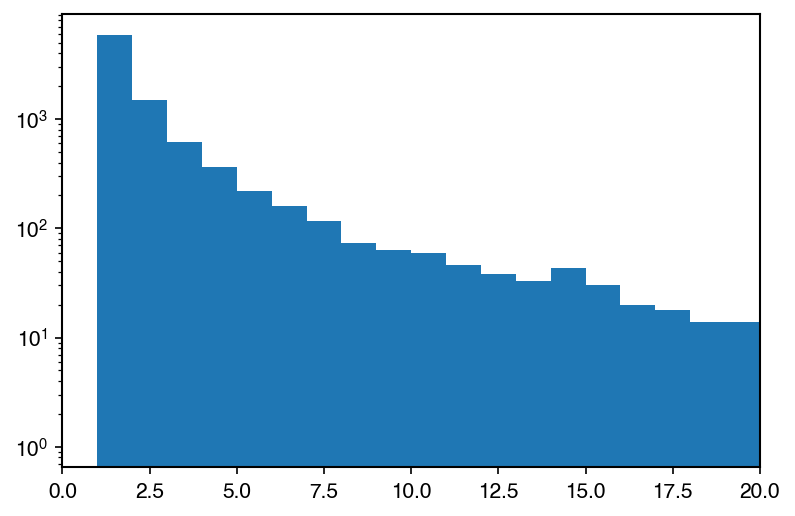

In [99]:
bins = np.linspace(0, 1700, 1700+1)
plt.hist(edges['weight'], bins=bins)
plt.xlim([0,20])
plt.yscale('log')
plt.show()

## Create network from edgelist

In [100]:
g = nx.from_pandas_edgelist(edges, source='source', target='target', edge_attr='weight', create_using=nx.DiGraph)

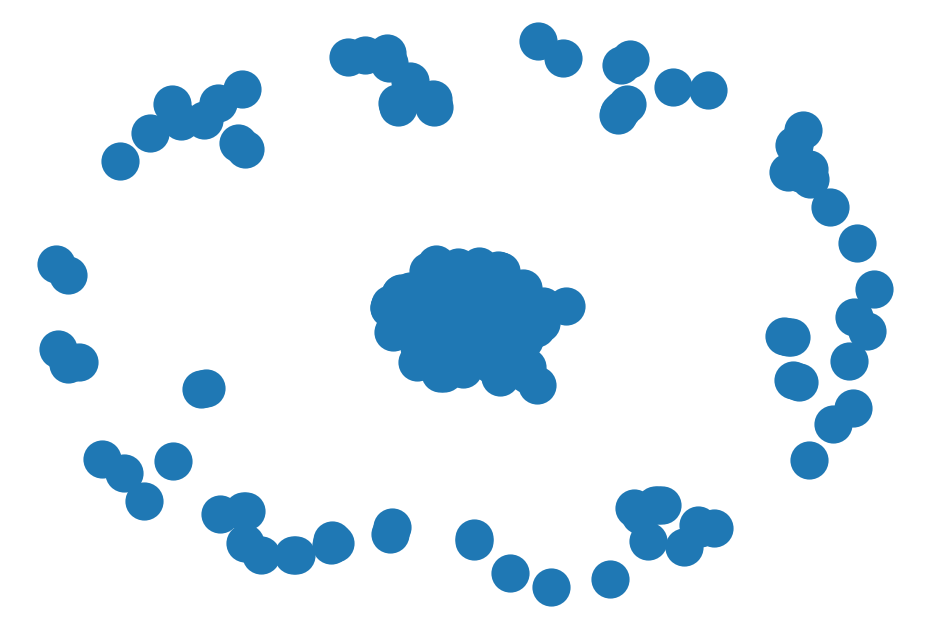

In [82]:
nx.draw(g.to_undirected())

In [ ]:
import networkx as nx
from netwulf import visualize

# G = nx.barabasi_albert_graph(100,m=1)
visualize(g)